# Problem
In this assignment, we were tasked with developing a script that would determine the position, velocity, and acceleration of a body in falling through the standard atmosphere. The body was dropped from an altitude of 100000 ft (30480 m), had masses of $m = 1, 10, 100\ [kg]$ and had drag coefficients $C_{d} = 0.5, 1.0, 1.5$. This is effectively a one-dimensional kinematics problem that can be solved using the same equations of state as a body in true free fall. The only major distinction between this problem is that there is a drag force that acts on the object throughout its flight.
<img src="AEE2201_HW1_FBD.png" alt="Free Body Diagram" style="width: 200px;"/>
As can be seen from the free body diagram, there is a force weight that is assumed to be constant throughout all points in the flight, and a drag force that is not constant throughout the flight. In this system, drag was modelled as:
$$D = \frac{1}{2} \rho v^{2} C_{d} A $$
where $\rho$ is the density of the air at that atmosphere, $C_{d}$ is the drag coefficient of the object, and $A$ is the cross-sectional area of the object perpendicular and affected by the fluid it is falling through. However, the major issue is that this system is time consuming to solve analytically as the standard atmosphere is not defined to be a continuous function, but is effectively a series of distinct equations, each corresponding to an isothermal or gradient layer in the atmosphere. Thus an attempt to solve the system numerically was chosen for ease of implementation. In this model, the same standard atmosphere function model that was developed in MAE1202 (Aerospace Practicum) was utilized for no other reason than the fact that it is familiar to me and it is reasonably accurate.
# Analysis
As previously stated, the major technical challenge with this problem is the fact that there is a varying drag force that not only varies with the velocity of the object, but also with the density of the fluid that it is falling through. Because we are using the standard atmosphere, the practical takeaway is that the density changes as a function of the height, so therefore the drag also changes as a function of the height. Because of this, a function was created that solves the system until the object reaches the ground using the Euler algorithm:
$$x_{t+1} = x_{t} + v_{t}\Delta t$$
$$v_{t+1} = v_{t} + a_{t}\Delta t$$
Because these are both first order equations that get solved consecutively, the only thing that we actually need to solve for is the acceleration of the object. The acceleration of this system is derived as:
$$D-W=m\dot{v}$$
$$(0.5 \rho v^{2} C_{d} A) - (mg) = m\dot{v}$$
$$((0.5 \rho v^{2} C_{d} A) - (mg)) m^{-1} = \dot{v}$$
The way the final script works is by solving the acceleration at each time step and using Euler's algorithm.

# Results
## Varying mass
The first variable that was investigated was the affect of changing the mass of the object. The drag coefficient was fixed at $C_{d} = 0.5$, and the cross sectional area was fixed at 1 sq. meter. The plots are for mass $m = 1,10,100\ [kg]$ respectively.

Mass: 1 kg | Drag Coefficient: 0.50 | Area: 1 sq. m.



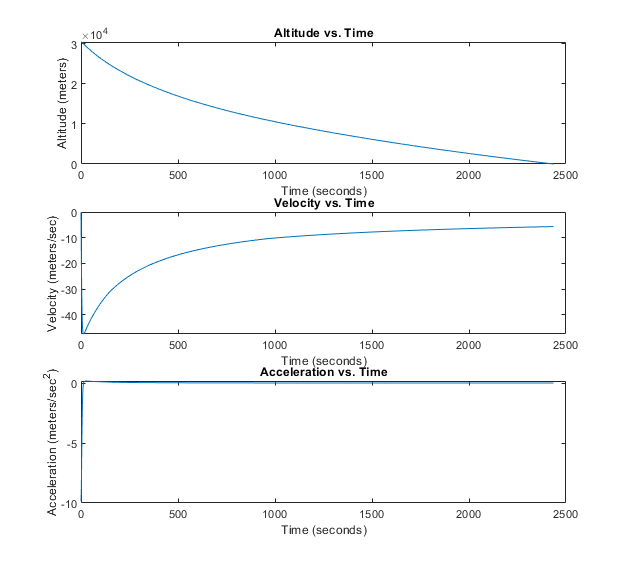

In [2]:
standatmFreeFall(1,0.5,1)

Mass: 10 kg | Drag Coefficient: 0.50 | Area: 1 sq. m.



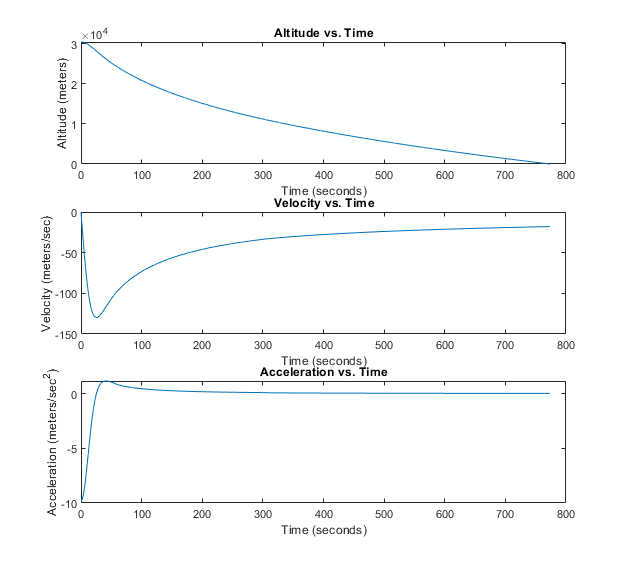

In [3]:
standatmFreeFall(10,0.5,1)

Mass: 100 kg | Drag Coefficient: 0.50 | Area: 1 sq. m.



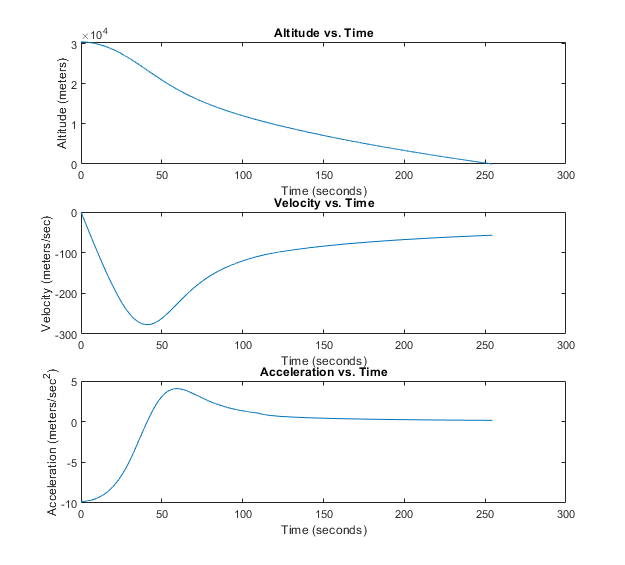

In [4]:
standatmFreeFall(100,0.5,1)

### Results
It is observed that the mass has two distinct affects on the behavior of the object as it falls through the atmosphere. Firstly, it affects the maximum speed that the object reaches. This is because the weight force is directly proportional to the mass wheras the drag force is not based on mass at all, so effectively the weight force has a longer time to dominate. The second phenomena that was observed was the time for the object to settle into a steady state. Steady state in this context is when the acceleration subplot reaches its "flat" segment, indicating that the object has reached dynamic terminal velocity. It is dynamic terminal velocity because as the density of the air changes, the drag force also changes, thus the terminal velocity of an object is a function of the height in this system. As can be seen on the first plot, the object with a mass of 1 kg reached its steady state very quickly (in under 10 seconds), whereas the 100 kg object took a much longer period of time to reach its steady state (almost 2 minutes).

## Varying Drag Coefficient
The second variable that was investigated was the effect of changing the drag coefficient of the object. The mass was fixed at $m = 25\ [kg]$. The cross sectional area was fixed at 1 sq. meter. The plots are for drag coefficients $C_{d} = 0.5,1.0,2.0$.

Mass: 25 kg | Drag Coefficient: 0.50 | Area: 1 sq. m.



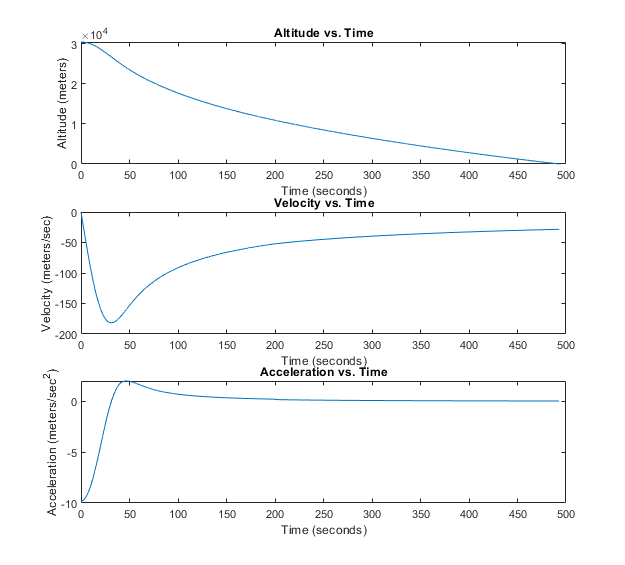

In [5]:
standatmFreeFall(25,0.5,1)

Mass: 25 kg | Drag Coefficient: 1.00 | Area: 1 sq. m.



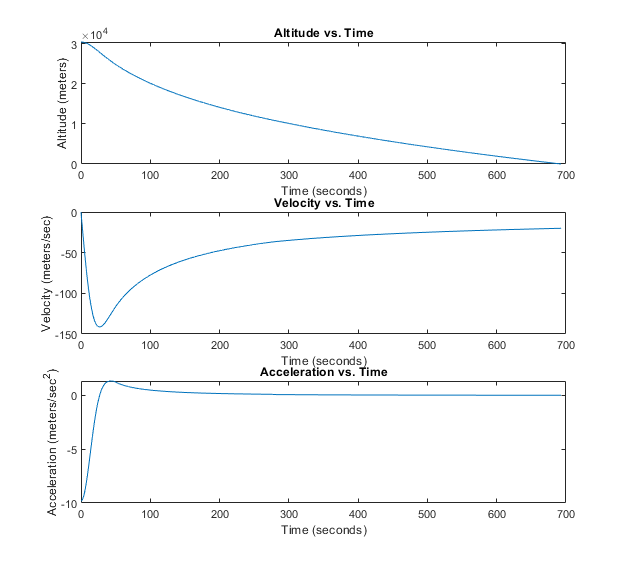

In [6]:
standatmFreeFall(25,1.0,1)

Mass: 25 kg | Drag Coefficient: 2.00 | Area: 1 sq. m.



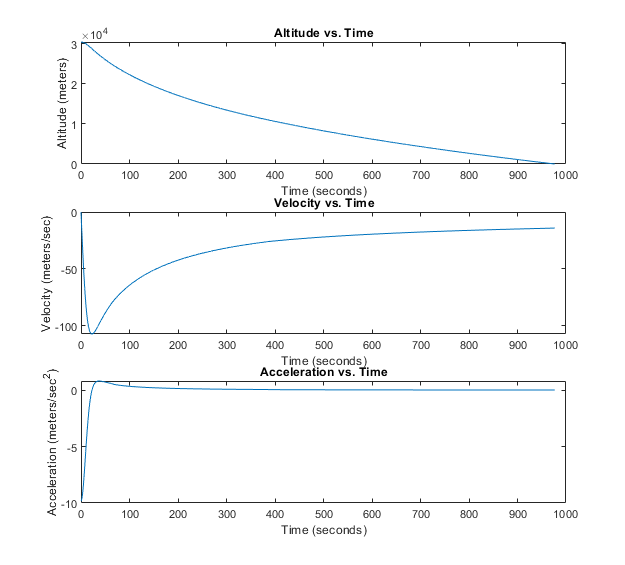

In [7]:
standatmFreeFall(25,2.0,1)

### Results
The drag coefficient was observed to contribute to two major flight characteristics. Firstly, it affects the maximum speed the object reaches. The object with the lowest drag coefficient ($C_{d} = 0.5$) reached the highest speed of all three of the objects simulated, reaching a speed of approximately 180 m/s. The object with the drag coefficient $C_{d} = 1.0$ reached a maximum speed of roughly 142 m/s and the object with a drag coefficient $C_{d} = 2.0$ reached a maximum speed of roughly 108 m/s. The second phenomena that was observed was that the increase in drag coefficient yields an increase in flight time by a substantial margin. The object with $C_{d} = 0.5$ had a flight time of 492.85 seconds, the object with $C_{d} = 1.0$ had a flight time of 692.86 seconds, and the object with $C_{d} = 2.0$ had a flight time 976.83 seconds. This likely occurs because the increased drag coefficient scales the force applied by the fluid linearly, and this allows the object to reach its steady state terminal velocity faster.
# Conclusion
A very simplistic attempt at modelling one dimensional flight characteristics of an object falling through a standard atmosphere. The effects of varying the mass and the drag coefficient were investigated. Further studies would include including a standard wind model and to determine the rotational characteristics of the object as it falls given an initial perturbation from its natural orientation.
# Appendix
## Standard Atmosphere Calculation Script

In [ ]:
function [temp,pressure,density] = standatm( alt )
%STANDATM  A function that accepts an altitude and returns t, p, and rho
%   Its just a glorified case structure that calls local functions
%   "isotherm" or "grad". Both of these members are simply passed the
%   parameter "alt" and they return an array containing temperature,
%   pressure, and density.
if alt >= 0 && alt <= 11
    [temp,pressure,density] = grad(alt);
elseif alt > 11 && alt <= 25
    [temp,pressure,density] = isotherm(alt);
elseif alt > 25 && alt <= 47
    [temp,pressure,density] = grad(alt);
elseif alt > 47 && alt <= 53
    [temp,pressure,density] = isotherm(alt);
elseif alt > 53  && alt <= 79
    [temp,pressure,density] = grad(alt);
elseif alt > 79 && alt <= 90
    [temp,pressure,density] = isotherm(alt);
elseif alt > 90 && alt <= 105
    [temp,pressure,density] = grad(alt);
end
end

function [temp,pressure,density] = isotherm ( alt )
%ISOTHERM I dont feel like typing these equations over and over.
%   Still just a glorified case structure. However this gets a little
%   interesting because of the fact that in order to get the temperature at
%   the base of a level, it needs to find the values at the top of the
%   gradient layer beneath it. In order to do this it calls the "grad"
%   function. The thing is that the gradient function often has initial
%   values that depend on the isothermal layer beneath it. Therefore it
%   calls the "isotherm" value at the base of its layer. This mean that in
%   order to calculate the values for any given altitude, there are
%   multiple calls to both the isotherm and grad functions. 

g_0 = 9.807;    % m/s^2
R = 287;    % constant
temp_1 = 216.66;    % kelvin
h_1 = 0;    % km

% This next chunk of code may be more efficient as a switch.
if alt > 11 && alt <= 25
    temp_1 = 216.66;
    [~,pressure_1,density_1] = grad(11); %throw out the temp
    h_1 = 11;
elseif alt > 47 && alt <= 53
    temp_1 = 282.66;
    [~,pressure_1,density_1] = grad(47); %throw out the temp
    h_1 = 47;
elseif alt > 79 && alt <= 90
    temp_1 = 165.66;
    [~,pressure_1,density_1] = grad(79); %throw out the temp
    h_1 = 79;
end

temp = temp_1;  % This is what makes it an isothermal layer
alt_m = alt * 1000; % Equations are in terms of meters
h_1_m = h_1 * 1000; % Convert km to meters
pressure = pressure_1 * exp((-(g_0)/(R * temp_1)) * (alt_m - h_1_m));   % Calculate pressure
density = density_1 * exp((-(g_0)/(R * temp_1)) * (alt_m - h_1_m));     % Calculate density
end

function [temp,pressure,density] = grad ( alt )
%GRAD Calculating temperature, pressure, and density in a gradient layer
%   See the explanation of the isothermal layer.

g_0 = 9.807;    % m/s^2
R = 287;    % constant
a = -6.5;   % kelvin/km
temp_1 = 288.16;    % kelvin
pressure_1 = 1.01325 * 10^5;    % pascals
density_1 = 1.2250; % kg/m^3
h_1 = 0;    % km

% This could also be refactored as a switch
if alt > 25 && alt <= 47
    a = 3;
    [temp_1,pressure_1,density_1] = isotherm(25);
    h_1 = 25;
elseif alt > 53 && alt <= 79
    a = -4.5;
    [temp_1,pressure_1,density_1] = isotherm(53);
    h_1 = 53;
elseif alt > 90 && alt <= 105
    a = 4;
    [temp_1,pressure_1,density_1] = isotherm(90);
    h_1 = 90;
end

a_m = a * (10 ^ -3);    % The equations work with meters not km
alt_m = alt * 1000;     % Again meters, not kilometers.
h_1_m = h_1 * 1000;     % See above.
temp = temp_1 + (a_m * (alt_m - h_1_m));    % Calculate temperature
pressure = pressure_1 * (1 + ((a_m / temp_1) * (alt_m - h_1_m)))^(-(g_0)/(a_m * R));    % Calculate pressure
density = density_1 * (1 + ((a_m / temp_1) * (alt_m - h_1_m)))^(-(((g_0)/(a_m * R))+1));    % Calculate density
end

## Flight Characteristic Calculator

In [ ]:
function standatmFreeFall(mass_, cd_, area_)
    mass = mass_;
    C_d = cd_;
    A = area_;
    acceleration = [];
    velocity = [];
    height = [];
    presentVelocity = 0;
    presentHeight = 30480; % 100000 ft in meters
    previousVelocity = 0;
    previousHeight = 30480; 
    dt = 0.01;
    FORCE_GRAV = -9.81;

    while presentHeight >= 0
        [~,~,currentDensity] = standatm( presentHeight/1000 );
        drag = .5 * currentDensity * (presentVelocity ^ 2) * A * C_d;
        weight = mass * FORCE_GRAV;
        totalForce = drag + weight;
        presentAcceleration = totalForce / mass;
        presentVelocity = previousVelocity - presentAcceleration*dt;

        presentHeight = previousHeight - presentVelocity*dt;
        acceleration = [acceleration presentAcceleration];
        velocity = [velocity presentVelocity];
        height = [height presentHeight];

        previousVelocity = presentVelocity;
        previousHeight = presentHeight;
    end
    endTime = (size(acceleration) - 1) * dt;
    velocity = velocity .* -1;

    figure(1)
    subplot(3,2,[1 2])
    plot(0:dt:endTime(2), height)
    title("Altitude vs. Time")
    xlabel("Time (seconds)")
    ylabel("Altitude (meters)")

    subplot(3,2,[3 4])
    plot(0:dt:endTime(2), velocity)
    title("Velocity vs. Time")
    xlabel("Time (seconds)")
    ylabel("Velocity (meters/sec)")

    subplot(3,2,[5 6])
    plot(0:dt:endTime(2), acceleration)
    title("Acceleration vs. Time")
    xlabel("Time (seconds)")
    ylabel("Acceleration (meters/sec^2)")
    
    runTitle = sprintf("Mass: %d kg | Drag Coefficient: %.2f | Area: %d sq. m.", mass, C_d, A);
end